In [1]:
cd '../..'

/home/tyz910/src/sberbank-covid19


# Самое простое решение для топ 3 второй недели

In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv('data/week2/train.csv', parse_dates=['date'])
train.head()

,date,country,confirmed,deaths
0,2020-04-19,RU-AD,91,2
1,2020-04-19,RU-AL,2,0
2,2020-04-19,RU-ALT,72,0
3,2020-04-19,RU-AMU,16,0
4,2020-04-19,RU-ARK,107,0


# Так епта бля.. тут у нас данных мало, коронавирус, хуе-мое, ну вроде растет, но если мы тупа в 2 раза умножим к концу недели, то скор на валидации становится... тааак, падажжи ебана

![](../../data/week2/epta.jpg)

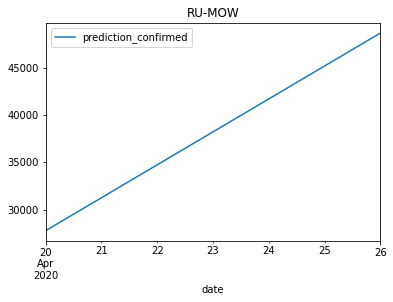

In [3]:
preds = pd.DataFrame()

for day, mul in enumerate(np.linspace(1.0, 2.0, 8)[1:], 1):
    preds = preds.append(pd.DataFrame({
        'date': train['date'].max() + pd.to_timedelta(day, 'd'),
        'country': train['country'],
        'prediction_confirmed': train['confirmed'] * mul,
        'prediction_deaths': train['deaths'] * mul,
    }), ignore_index=True)

country = 'RU-MOW'
preds[preds['country'] == country].set_index('date')[['prediction_confirmed']].plot(title=country)

In [4]:
validate = pd.read_csv('data/week2/validate.csv', parse_dates=['date'])

data = pd.merge(preds, validate, on=['date', 'country'])
data['score'] = np.log10((data['confirmed'] + 1.0) / (data['prediction_confirmed'] + 1.0)).abs()
data.groupby('date')['score'].mean().sum()

0.49515339458015156